In [118]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np

# load modules related to this exercise
#import tools
#import plots
#from model import model_bufferstock
from ConsumptionSavingModel import ConsumptionSavingModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Solving the buffer-stock consumption model

Consider the canonical buffer-stock consumption model:

Bellman equation in ratio form: 

$$\begin{align*}
v_{t}(m_{t}) & = \max_{c_{t}}\left\{ \frac{c_{t}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{t}\left[(G L_{t+1} \psi_{t+1})^{1-\rho}v_{t+1}(m_{t+1})\right]\right\} \\
 & \text{s.t.}\\
 a_t & =  m_t-c_t \\
m_{t+1} & =  \frac{1}{G L_t \psi_{t+1}}Ra_t+\xi_{t+1}\\ 
\psi_{t} & \sim  \exp \mathcal{N}(-0.5 \sigma^2_{\psi},\sigma^2_{\psi})\\
\xi_{t} & \sim  \exp \mathcal{N}(-0.5 \sigma^2_{\xi},\sigma^2_{\xi}) \\
\end{align*}$$

and remember
$$\begin{align*}
Y_{t+1}& = \psi_{t+1} P_{t+1} \\
P_{t+1}& = GL_tP_t\psi_{t+1}\\ 
c_t & \equiv C_t/P_t \\
m_t & \equiv M_t/P_t \\
a_t & \equiv A_t/P_t \\
p_t & \equiv \ln(P_t) \\
y_t & \equiv \ln(Y_t) \\
\end{align*}$$



In [129]:
#Load baseline settings
model = ConsumptionSavingModelClass()

In [130]:
#Solve and simulate
model.precompile_numba()
model.solve()
model.simulate()

model simulated in 0.0 secs
model simulated in 0.1 secs


In [91]:
from consav import linear_interp
t = 5
m = 4
m_eps = 0.00855
c0 = linear_interp.interp_1d(model.sol.m[t,:],model.sol.c[t,:],m)
c1 = linear_interp.interp_1d(model.sol.m[t,:],model.sol.c[t,:],m+m_eps)

mpc = (c1-c0)/m_eps
mpc

#mean_mpc = np.mean(model.sim.mpc,axis=0)
#mean_mpc

0.0518803303444525

In [131]:
model.sim.c
#model.sol

array([[1.05174557, 0.99895797, 1.0217942 , ..., 1.01204274, 0.91032836,
        0.96601063],
       [1.02139089, 1.02537079, 1.03889215, ..., 1.00655092, 1.04353022,
        0.97496201],
       [1.01456821, 1.01775736, 1.00726722, ..., 1.00229439, 1.04649033,
        0.89945169],
       ...,
       [1.26481909, 1.19442412, 1.24872928, ..., 1.23544268, 1.19155093,
        1.27795266],
       [1.25771615, 1.18771651, 1.2417167 , ..., 1.22850472, 1.18485945,
        1.27077597],
       [1.25065311, 1.18104657, 1.23474351, ..., 1.22160572, 1.17820556,
        1.26363959]])

In [44]:
#Solve and simulate
par.solmethod = 'egm'
model.solve()
model.simulate()

sol_egm = model.sol
sim_egm = model.sim


In [45]:
sol_egm.c

array([[ 0., nan, nan, ..., nan, nan, nan],
       [ 0., nan, nan, ..., nan, nan, nan],
       [ 0., nan, nan, ..., nan, nan, nan],
       ...,
       [ 0., nan, nan, ..., nan, nan, nan],
       [ 0., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

#### Plots

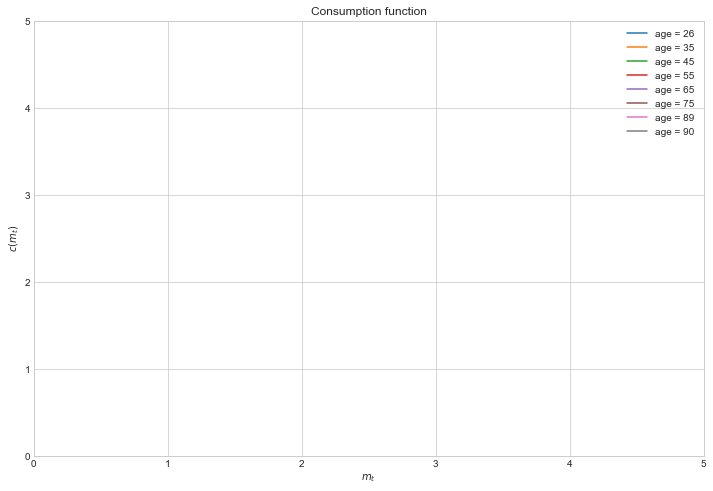

In [35]:
plots.plot_consumption(sol,par)

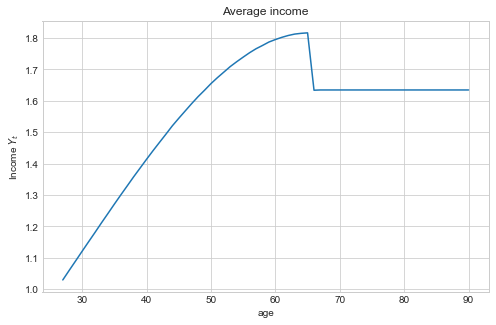

In [36]:
plots.plot_avg_income(sim,par)

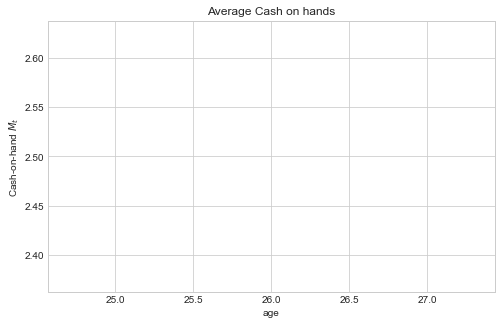

In [37]:
plots.plot_avg_cash_on_hand(sim,par)

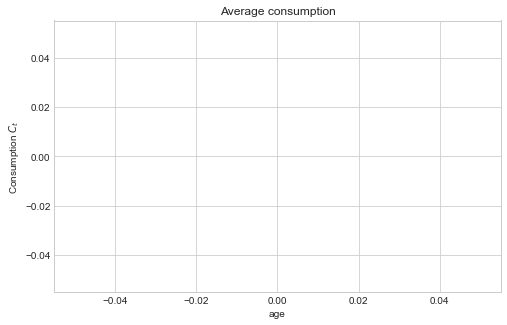

In [38]:
plots.plot_avg_consumption(sim,par)

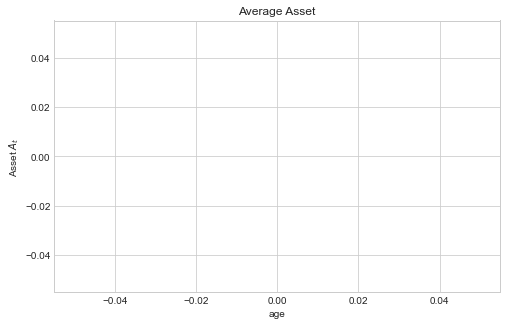

In [39]:
plots.plot_avg_assets(sim,par)